In [27]:
!pip install --pre mxnet-cu92

Import time Function to calculate Time

In [0]:
import mxnet as mx

In [0]:
import random
import sys
from io import BytesIO
import gzip
import struct
import mxnet as mx
from mxnet import nd
from mxnet.gluon import nn
from mxnet import gluon
import numpy as np
import cv2

In [0]:
from mxnet import nd, gluon, init, autograd
from mxnet.gluon import nn
from mxnet.gluon.data.vision import datasets, transforms
import matplotlib.pyplot as plt
from time import time

GET DATA

In [31]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("model_data/", one_hot=True)

Extracting model_data/train-images-idx3-ubyte.gz
Extracting model_data/train-labels-idx1-ubyte.gz
Extracting model_data/t10k-images-idx3-ubyte.gz
Extracting model_data/t10k-labels-idx1-ubyte.gz


In [0]:
X_train = mnist.train.images
y_train =mnist.train.labels
X_test =mnist.test.images
y_test =mnist.test.labels

In [0]:
# Training Parameters
learning_rate = 0.001
num_steps = 20
batch_size = 128
# Network Parameters
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.25 # Dropout, probability to drop a unit

In [0]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [35]:
X_train.shape

(55000, 28, 28, 1)

In [0]:
mnist_train = datasets.MNIST(train=True)

In [37]:
mnist_train

In [38]:

X, y = mnist_train[0]
('X shape: ', X.shape, 'X dtype', X.dtype, 'y:', y)

('X shape: ', (28, 28, 1), 'X dtype', numpy.uint8, 'y:', 5)

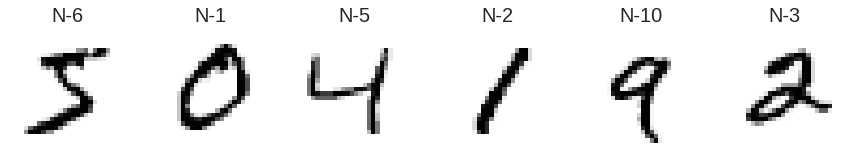

In [39]:
text_labels = [
    'N-1', 'N-2', 'N-3', 'N-4', 'N-5',
    'N-6', 'N-7', 'N-8', 'N-9', 'N-10'
]
X, y = mnist_train[0:6]
# plot images
_, figs = plt.subplots(1, X.shape[0], figsize=(15, 15))
for f,x,yi in zip(figs, X,y):
    # 3D->2D by removing the last channel dim
    f.imshow(x.reshape((28,28)).asnumpy())
    ax = f.axes
    ax.set_title(text_labels[int(yi)])
    ax.title.set_fontsize(20)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.13, 0.31)])

mnist_train = mnist_train.transform_first(transformer)

In [0]:
batch_size = 256

train_data = gluon.data.DataLoader(
    mnist_train, batch_size=batch_size, shuffle=True, num_workers=4)

In [42]:
for data, label in train_data:
    print(data.shape, label.shape)
    break

(256, 1, 28, 28) (256,)


In [0]:
mnist_valid = gluon.data.vision.MNIST(train=False)
valid_data = gluon.data.DataLoader(
    mnist_valid.transform_first(transformer),
    batch_size=batch_size, num_workers=4)

DEFINE THE MODEL 

In [0]:
net = nn.Sequential()
net.add(nn.Conv2D(channels=6, kernel_size=5, activation='relu'),
        nn.MaxPool2D(pool_size=2),
        nn.Conv2D(channels=16, kernel_size=3, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Flatten(),
        nn.Dense(1024),
        nn.Dropout(dropout),
        nn.Dense(num_classes,activation="relu"))
net.initialize(init=init.Xavier())

In [0]:
softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()

In [0]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})

TRAIN

In [0]:
def acc(output, label):
    # output: (batch, num_output) float32 ndarray
    # label: (batch, ) int32 ndarray
    return (output.argmax(axis=1) ==
            label.astype('float32')).mean().asscalar()

In [0]:
#import time
#start = time.time() #start time

In [0]:
def callstarttime():
    import time
    start = time.time() #start time
    return start

In [0]:
s = callstarttime()

In [51]:
for epoch in range(num_steps):
    train_loss, train_acc, valid_acc = 0., 0., 0.
    tic = time()
    for data, label in train_data:
        # forward + backward
        with autograd.record():
            output = net(data)
            loss = softmax_cross_entropy(output, label)
        loss.backward()
        # update parameters
        trainer.step(batch_size)
        # calculate training metrics
        train_loss += loss.mean().asscalar()
        train_acc += acc(output, label)

    # calculate validation accuracy
    for data, label in valid_data:
        valid_acc += acc(net(data), label)

    print("Epoch %d: Loss: %.3f, Train acc %.3f, Test acc %.3f, \
Time %.1f sec" % (
        epoch, train_loss/len(train_data),
        train_acc/len(train_data),
        valid_acc/len(valid_data), time()-tic))

Epoch 0: Loss: 1.781, Train acc 0.357, Test acc 0.464, Time 26.6 sec
Epoch 1: Loss: 1.417, Train acc 0.498, Test acc 0.503, Time 26.5 sec
Epoch 2: Loss: 1.403, Train acc 0.501, Test acc 0.526, Time 26.5 sec
Epoch 3: Loss: 1.187, Train acc 0.593, Test acc 0.595, Time 26.3 sec
Epoch 4: Loss: 1.033, Train acc 0.662, Test acc 0.782, Time 26.5 sec
Epoch 5: Loss: 0.762, Train acc 0.779, Test acc 0.784, Time 26.7 sec
Epoch 6: Loss: 0.619, Train acc 0.839, Test acc 0.889, Time 26.8 sec
Epoch 7: Loss: 0.508, Train acc 0.884, Test acc 0.889, Time 26.5 sec
Epoch 8: Loss: 0.212, Train acc 0.954, Test acc 0.984, Time 26.7 sec
Epoch 9: Loss: 0.052, Train acc 0.984, Test acc 0.987, Time 26.5 sec
Epoch 10: Loss: 0.045, Train acc 0.986, Test acc 0.988, Time 26.6 sec
Epoch 11: Loss: 0.043, Train acc 0.987, Test acc 0.989, Time 26.6 sec
Epoch 12: Loss: 0.039, Train acc 0.988, Test acc 0.987, Time 26.7 sec
Epoch 13: Loss: 0.037, Train acc 0.989, Test acc 0.986, Time 26.8 sec
Epoch 14: Loss: 0.035, Train a

In [52]:
import time

end = time. time()
a =end - s
print("The Time taken by model to run in seconds is %.2f seconds "%a)

The Time taken by model to run in seconds is 532.51 seconds 
